# Beam Domain and Delay Domain Sparsity in Wireless Channel Models

In wireless communication, particularly in the context of massive MIMO (Multiple Input Multiple Output) systems and millimeter-wave (mmWave) communication, beam domain and delay domain sparsity are concepts related to the characteristics of the wireless channel.

**Beam Domain Sparsity:**

In the beam domain, sparsity refers to the phenomenon where only a few beams or beamforming directions experience significant channel gains, while the majority of beams exhibit low channel gains or negligible contributions. This sparsity arises due to the directional nature of beamforming in massive MIMO and mmWave systems.
Essentially, beam domain sparsity implies that only a small subset of beams are effective for communication, while the rest can be considered inactive or irrelevant. Exploiting this sparsity allows for efficient beamforming and signal processing algorithms that focus computational resources on the most relevant beams.


**Delay Domain Sparsity:**

In the delay domain, sparsity refers to the characteristic where the wireless channel exhibits significant energy or power only at certain delay (time) intervals, while the remaining delay intervals have low or negligible channel energy. This sparsity arises due to phenomena such as multipath propagation, where signals arrive at the receiver through multiple paths with different delays.
Delay domain sparsity implies that the channel impulse response, which describes how the channel responds to a short-duration input signal, has a sparse representation in the delay domain. Exploiting this sparsity allows for efficient channel estimation and equalization techniques, particularly in scenarios with rich multipath propagation.


In summary, beam domain sparsity and delay domain sparsity are characteristics of wireless channels that arise due to the directional nature of beamforming and the multipath propagation phenomenon, respectively. Exploiting these sparsity properties is essential for designing efficient signal processing algorithms in advanced wireless communication systems.



The tutorial covers the following:

- [Import Libraries](#Import-Libraries)
    - [Import Python Libraries](#Import-Python-Libraries)
    - [Import 5G Libraries](#Import-5G-Toolkit)
- [Simulation Parameters](#Simulation-Parameters)
- [Antenna Arrays](#Antenna-Arrays)
    - [Antenna Array at Rx](#Antenna-Arrays-at-Rx)
    - [Antenna Array at Tx](#Antenna-Arrays-at-Tx)
- [Node Mobility](#Node-Mobility)
- [Simulation-Layout](#Simulation-Layout)
- [Channel Parameters, Channel Coefficients and OFDM Channel](#Channel-Parameters,--Channel-Coefficients-and-OFDM-Channel)

The tutorial will demonstate the following features which are expected characteristics of wireless channels:

- Heatmap of beam domain channel
- Power delay profile to demonstate the delay domain sparsity

## Import Libraries

### Import Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np

## Import 5G Toolkit

In [2]:
# importing necessary modules for simulating channel model
import sys
sys.path.append("../../../")
from toolkit5G.ChannelModels import NodeMobility
from toolkit5G.ChannelModels import AntennaArrays
from toolkit5G.ChannelModels import SimulationLayout

In [3]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:60% !important; }</style>"))

## Simulation Parameters

Define the following Simulation Parameters:

  * ``propTerrain`` defines propagation terrain for BS-UE links
  * ``carrierFrequency`` defines  carrier frequency in Hz
  * ``nBSs`` defines number of Base Stations (BSs)
  * ``nUEs`` defines number of User Equipments (UEs) 
  * ``nSnapShots`` defines number of SnapShots, where SnapShots correspond to different time-instants at which a mobile user channel is being generated. 

In [4]:
# Simulation Parameters
propTerrain      = "UMa"         # Propagation Scenario or Terrain for BS-UE links
carrierFrequency = 3.6*10**9     # carrier frequency in Hz
nBSs             = 21            # number of BSs 
nUEs             = 10            # number of UEs 


## Antenna Arrays
### Antenna Array at Rx

The following steps describe the procedure to generate AntennaArrays Objects at a single carrier frequency both at Tx and Rx side:

* Choose an omni directional dipole antenna for Rx, for which we have to pass the string "OMNI" while instantiating `AntennaArrays` class.

* Pass `arrayStructure` of `[1,1,2,2,1]` meaning 1 panel in vertical direction, 1 panel in horizonatal direction, 2 antenna elements per column per panel, 2 columns per panel and 1 correspond to antenna element being single polarized. 

* For this antenna structure, the number of Rx antennas `Nr` to be 4.



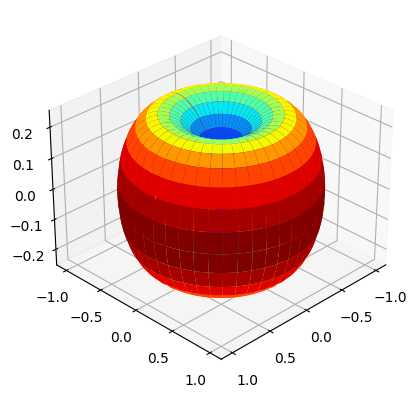

In [5]:
# Antenna Array at UE side
# antenna element type to be "OMNI"
# with single panel and 4 single polarized antenna element per panel.
ueAntArray = AntennaArrays(antennaType = "OMNI", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,4,4,1]))
                            
ueAntArray()

# num of Rx antenna elements
nr = ueAntArray.numAntennas
# Radiation Pattern of Rx antenna element 
fig, ax = ueAntArray.displayAntennaRadiationPattern()

### Antenna Array at Tx

* We choose a parabolic antenna for Tx, for which we have to pass the string `"3GPP_38.901"` while instantiating `AntennaArrays` class.

* We pass `arrayStructure` of `[1,1,2,4,2]` meaning 1 panel in vertical direction, 1 panel in horizonatal direction, 2 antenna elements per column per panel, 4 columns per panel and 2 correspond to     antenna element being dual polarized. 

* With this structure, we obtain number of Tx antennas `nt` to be 16. 

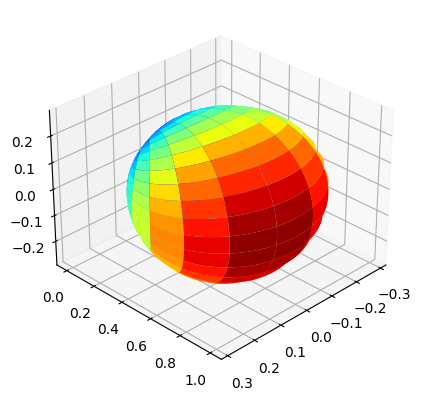

In [6]:
# Antenna Array at BS side
# antenna element type to be "3GPP_38.901", a parabolic antenna 
# with single panel and 8 dual polarized antenna element per panel.


bsAntArray = AntennaArrays(antennaType     = "3GPP_38.901", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,8,8,1]))
bsAntArray()

# num of Tx antenna elements
nt = bsAntArray.numAntennas
# Radiation Pattern of Tx antenna element 
fig, ax = bsAntArray.displayAntennaRadiationPattern()

## Simulation Layout

We define the simulation topology parametes:

 - ``ISD``: Inter Site Distance
 - ``minDist``: Minimum distance between transmitter and receiver.
 - ``bsHt``: BS heights 
 - ``ueHt``: UE heights
 - ``topology``: Simulation Topology
 - ``nSectorsPerSite``: Number of Sectors Per Site
 
Furthermore, users can access and update following parameters as per their requirements for channel using the handle simLayoutObj.x where x is:

 - The following parameters can be accessed or updated immendiately after object creation
    - ``UEtracks``
    - ``UELocations``
    - ``ueOrientation``
    - ``UEvelocityVector``
    - ``BStracks``
    - ``BSLocations``
    - ``bsOrientation``
    - ``BSvelocityVector``
    
 - The following parameters can be accessed or updated after calling the object
    - ``linkStateVec``
    
    

      enableSpatialConsistency: True
               memoryEfficient: False
enableSpatialConsistencyIndoor: True


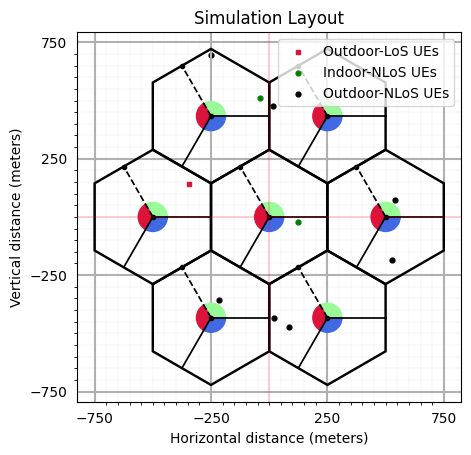

In [7]:
# Layout Parameters
isd             = 500         # inter site distance
minDist         = 35          # min distance between each UE and BS 
ueHt            = 1.5         # UE height
bsHt            = 35          # BS height
topology        = "Hexagonal" # BS layout type
nSectorsPerSite = 3           # number of sectors per site
  

# simulation layout object                                 
simLayoutObj = SimulationLayout(numOfBS = nBSs, 
                                numOfUE = nUEs,
                                heightOfBS = bsHt, 
                                heightOfUE = ueHt,
                                ISD = isd, 
                                layoutType = topology, 
                                numOfSectorsPerSite = nSectorsPerSite) 

# Update UE location for motion over a circle centered around the BS location.
# simLayoutObj.UELocations = -simLayoutObj.UEtracks.mean(0)

simLayoutObj(terrain = propTerrain,
             carrierFreq = carrierFrequency,
             ueAntennaArray = ueAntArray,
             bsAntennaArray = bsAntArray,
             forceLOS = False)

# displaying the topology of simulation layout

fig, ax = simLayoutObj.display2DTopology()


## Channel Parameters,  Channel Coefficients and OFDM Channel

The user can access the channel coefficents and other parameters using following handles:

- LSPs/SSPs: paramGenObj.x where x is
    - ``linkStateVec``
    - ``delaySpread``
    - ``phiAoA_LoS``, ``phiAoA_mn``, ``phiAoA_spread``
    - ``thetaAoA_LoS``, ``thetaAoA_mn``, ``thetaAoA_spread``
    - ``phiAoD_LoS``, ``phiAoD_mn``, ``phiAoD_spread``
    - ``thetaAoD_LoS``, ``thetaAoD_mn``, ``thetaAoD_spread``
    - ``xpr``
    - ``pathloss``, ``pathDelay``, ``pathPower``
    - ``shadowFading``
    
- Channel Co-efficeints: channel.x where x is
    - ``coefficients`` 
    - ``delays``

- Shape of OFDM Channel:
    - `Hf` is of shape : ``(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, Nfft, number of Rx antennas, number of Tx antennas)``

In [8]:
# Generate SSPs/LSPs Parameters: 
paramGenObj = simLayoutObj.getParameterGenerator()

# Generate Channel Coefficeints and Delays: SSPs/LSPs
channel = paramGenObj.getChannel(applyPathLoss = True)
# Channel coefficients can be accessed using: channel.coefficients
# Channel delays can be accessed using:       channel.delays

# Generate OFDM Channel
Nfft = 2048
Hf   = channel.ofdm(30*10**3, Nfft, simLayoutObj.carrierFrequency)

[Warning]: Pathloss model for UMa is defined only for BS height 'hBS' = 25! Ignoring for now but might results in unexpected behaviour!
[Warning]: UE height 'hUE' cannot be less than 1.5! These values are forced to 1.5! for 'UMa' 
[Warning]: Pathloss model for UMa is defined only for BS height 'hBS' = 25! Ignoring for now but might results in unexpected behaviour!
[Warning]: UE height 'hUE' cannot be less than 1.5! These values are forced to 1.5! for 'UMa' 


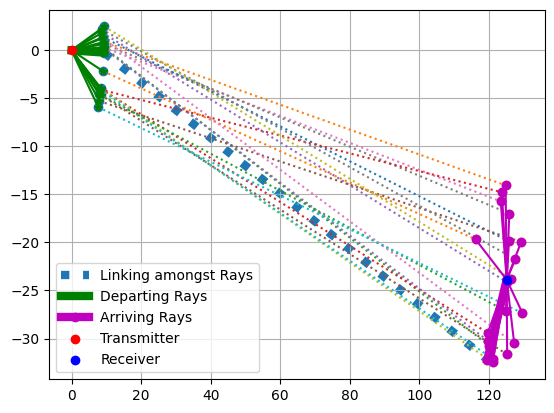

In [9]:
fig, ax = paramGenObj.displayClusters(indices=(0, 1, 0), rayIndex=1, carrierIndex=0, 
                                      radiusRx=10, radiusTx=10, displayPlot=False)

In [10]:
Hf.shape

(1, 1, 21, 10, 2048, 16, 64)

## Demonstrating the Beam Domain Sparsity

In [11]:
bsIndex = 0
ueIndex = 0
scIndex = 0
Nt      = Hf.shape[-1]
Nr      = Hf.shape[-2]
overSamplingFactorTx = 4
overSamplingFactorRx = 4

Ftx = np.fft.ifft(np.eye(overSamplingFactorTx*Nt), overSamplingFactorTx*Nt)[0:Nt]
Frx = np.fft.ifft(np.eye(overSamplingFactorRx*Nr), overSamplingFactorRx*Nr)[:,0:Nr]

Hbeam = Frx@Hf[0,0,bsIndex,ueIndex,scIndex]@Ftx
Hbeam = np.fft.fft(np.fft.fft(Hf[0,0,bsIndex,ueIndex,scIndex], axis = -1), axis = -2)

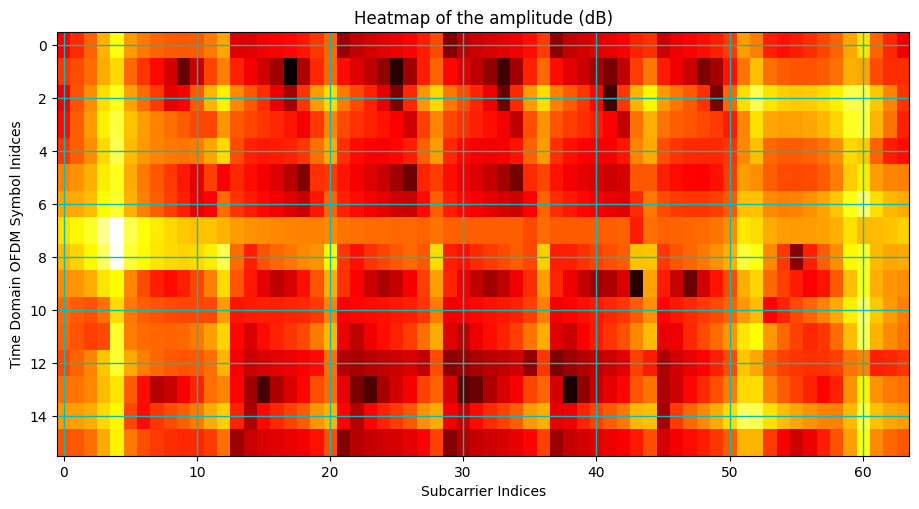

In [12]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

ax.imshow(10*np.log10(np.abs(Hbeam)), cmap = 'hot', interpolation='nearest', aspect = "auto")
ax = plt.gca();
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("Subcarrier Indices")
ax.set_ylabel("Time Domain OFDM Symbol Inidces")
ax.set_title("Heatmap of the amplitude (dB)")

# Gridlines based on minor ticks
plt.show()

## Demonstrating the Delay Domain Sparsity

In [16]:
bsIndex   = 0
ueIndex   = 0
txAntenna = 0
rxAntenna = 0

Nt      = Hf.shape[-1]
Nr      = Hf.shape[-2]
overSamplingFactorTx = 4
overSamplingFactorRx = 4

ht       = np.fft.ifft(Hf[0,0,bsIndex,ueIndex,:,rxAntenna,txAntenna], n = Nfft, axis=0, norm = "ortho")

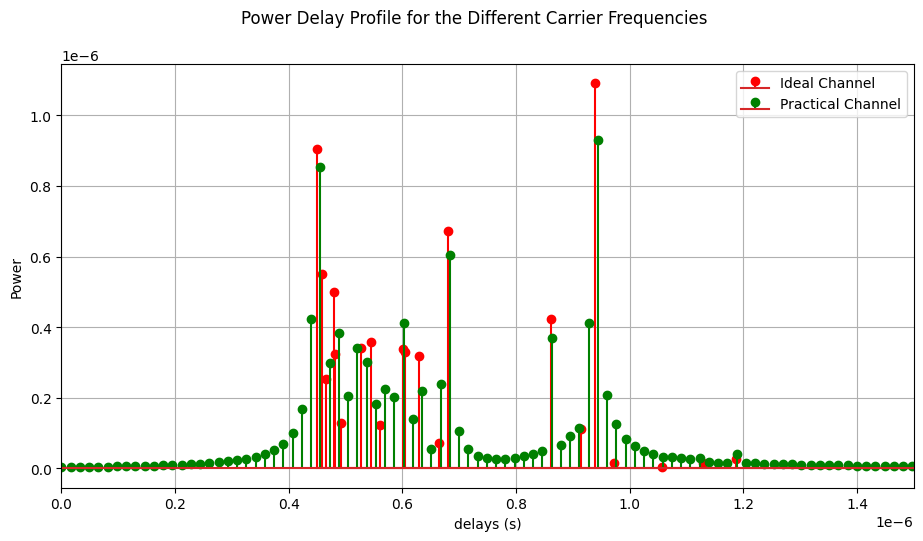

In [18]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
snapIndex    = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

tau = channel.delays[0,0,bsIndex,ueIndex]

ax.stem(tau, np.abs(channel.coefficients[0,0,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax.stem(np.arange(Nfft)/(Nfft*channel.subCarrierSpacing), np.abs(ht), "g", label = "Practical Channel")
ax.legend()
ax.set_xlim([0, 0.15*10**-5])
ax.set_xlabel("delays (s)")
ax.set_ylabel("Power")
ax.grid()

fig.suptitle("Power Delay Profile for the Different Carrier Frequencies")
plt.show()